In [3]:
# Importing libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('ggplot')

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

#Reading the data
df = pd.read_csv(r'C:\Users\ankit\Desktop\Alex Projects\Project 4\Movies.csv')

In [6]:
#Looking for missing data
for col in df.columns:
    pct_missing = df[col].isnull().sum().sum()
    print('{} - {}'.format(col,pct_missing))
    


name - 0
rating - 0
genre - 0
year - 0
released - 0
score - 0
votes - 0
director - 0
writer - 0
star - 0
country - 0
budget - 0
gross - 0
company - 0
runtime - 0


In [63]:
#Snapshot of the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedYearformat
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980 (United States)"
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980 (United States)"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980 (United States)"
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980 (United States)"
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980 (United States)"


In [5]:
# Deleting rows with missing values
for col in df.columns:
    df.dropna(subset = [col], axis = 0, inplace = True)

In [7]:
# Column Data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
# changing data type
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')


In [9]:
# Formatting the released column 
df['releaseMonth'] = df['released'].str.split(' ').str[0]
df['releaseDate'] = df['released'].str.split(' ').str[1]
df['releaseYear'] = df['released'].str.split(' ').str[2]
df['releaseCountry'] = df['released'].str.split(' ').str[3] +' '+ df['released'].str.split(' ').str[4]

df.drop(['releaseDate'], axis = 1, inplace = True)
df.drop(['released'], axis = 1, inplace = True)





In [10]:
# Need to check the new column values for Null
print('Number of months with value NaN :', df['releaseMonth'].isnull().sum())
print('Number of year with value NaN :',df['releaseYear'].isnull().sum())
print('Number of Countries with value NaN :',df['releaseCountry'].isnull().sum())

Number of months with value NaN : 0
Number of year with value NaN : 2
Number of Countries with value NaN : 248


In [11]:
# Sorting highest grossing movies
df = df.sort_values(by = ['gross'], inplace = False, ascending = False)

In [12]:
# Checking for duplicate records

duplicateRecord = df[df.duplicated()]
print('Number of duplicate records :', duplicateRecord.shape[0])

Number of duplicate records : 0


In [13]:
# things that might be having an impact on the Gross earning of a film which we need to check
#     1.  Budget
#     2.  Votes
#     3.  Score
#     4.  Release Month
#     5.  Rating
#     6.  Genre

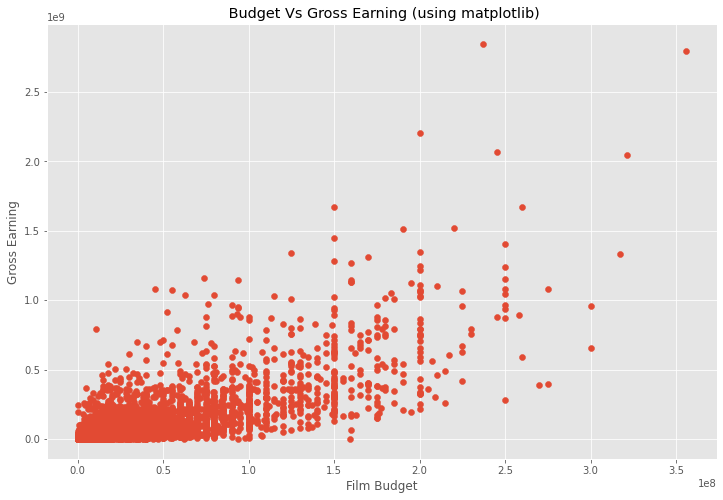

In [15]:
# Budget Vs Gross Earning
## Scatter Plot using matplotlib

plt.scatter(x = df['budget'], y = df['gross'] )
plt.title(' Budget Vs Gross Earning (using matplotlib)')
plt.xlabel('Film Budget')
plt.ylabel('Gross Earning')
plt.show()

Text(0, 0.5, 'Gross Earning')

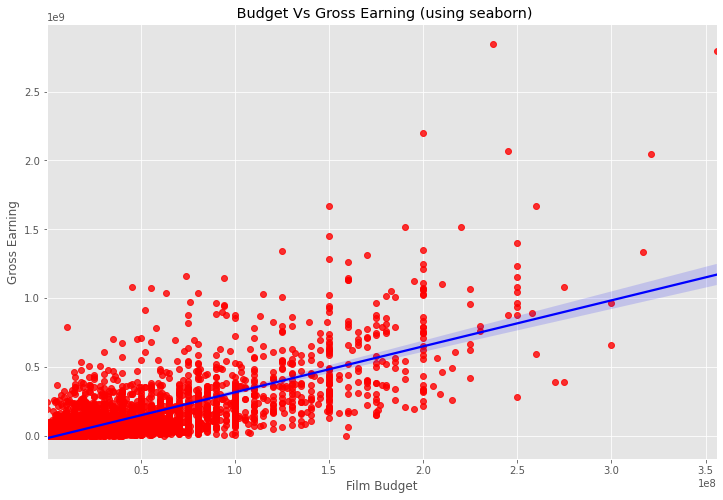

In [16]:
# Regplot using seaborn

sns.regplot( x = 'budget', y = 'gross', data = df,
            scatter_kws = {'color':'red'}, line_kws = {'color':'blue'})
plt.title(' Budget Vs Gross Earning (using seaborn)')
plt.xlabel('Film Budget')
plt.ylabel('Gross Earning')

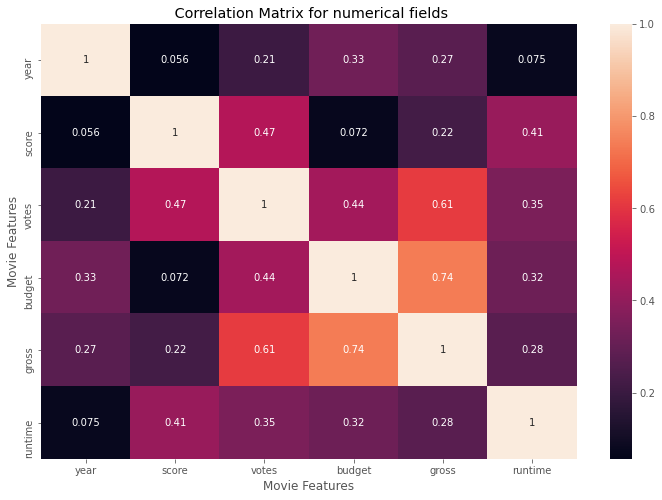

In [26]:
# Correlation between different numeric fields in the data
# 3 different types of correlation is there
## i. pearson (by default)
## ii. kendall
## iii. spearman
corr_matrix = df.corr(method = 'pearson')
sns.heatmap(corr_matrix, annot = True)
plt.title(' Correlation Matrix for numerical fields')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

# There is a high correlation between Budget and Gross earnings of the film.

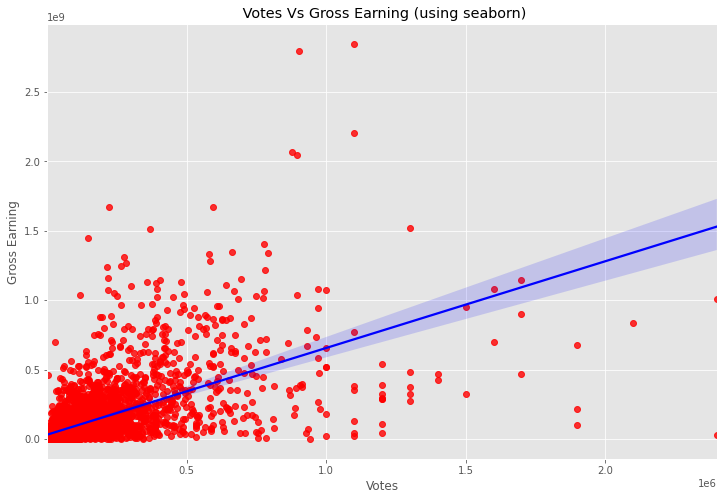

In [27]:
sns.regplot( x = 'votes', y = 'gross', data = df,
            scatter_kws = {'color':'red'}, line_kws = {'color':'blue'})
plt.title(' Votes Vs Gross Earning (using seaborn)')
plt.xlabel('Votes')
plt.ylabel('Gross Earning')
plt.show()

# There is moderate correlation between number of votes and the gross earning of a film

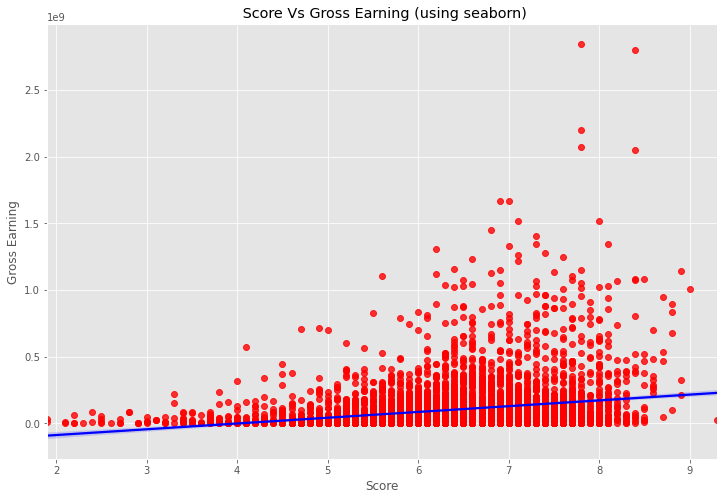

In [28]:
sns.regplot( x = 'score', y = 'gross', data = df,
            scatter_kws = {'color':'red'}, line_kws = {'color':'blue'})
plt.title(' Score Vs Gross Earning (using seaborn)')
plt.xlabel('Score')
plt.ylabel('Gross Earning')
plt.show()

# There is very low corrrelation between the film score and the gross earnings of the film

In [50]:
# Converting non-numeric data i.e. categorical data to numeric format by assigning numeric variables
df_encoded = df
catColumn_list = ['rating','genre','releaseMonth']

for col_name in df_encoded.columns:
    if (df_encoded[col_name].name in catColumn_list):
        df_encoded[col_name] = df_encoded[col_name].astype('category')
        df_encoded[col_name] = df_encoded[col_name].cat.codes


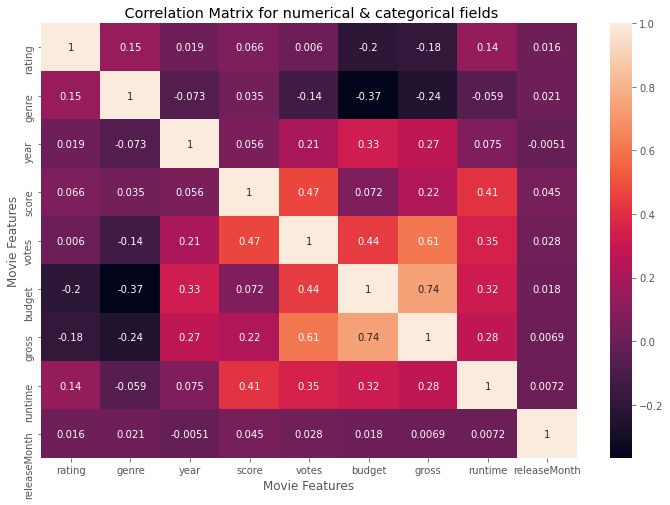

In [54]:
corr_matrix_cat = df_encoded.corr(method = 'pearson')
sns.heatmap(corr_matrix_cat, annot = True)
plt.title(' Correlation Matrix for numerical & categorical fields')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

# We observe there is not much correlation between the 3 categorical datas that we considered against the gross earning.

In [56]:
# Converting all non-numerical data to compare it 

df_encoded_all = df

for col_name in df_encoded_all.columns:
    if (df_encoded_all[col_name].dtype == 'object'):
        df_encoded_all[col_name] = df_encoded_all[col_name].astype('category')
        df_encoded_all[col_name] = df_encoded_all[col_name].cat.codes

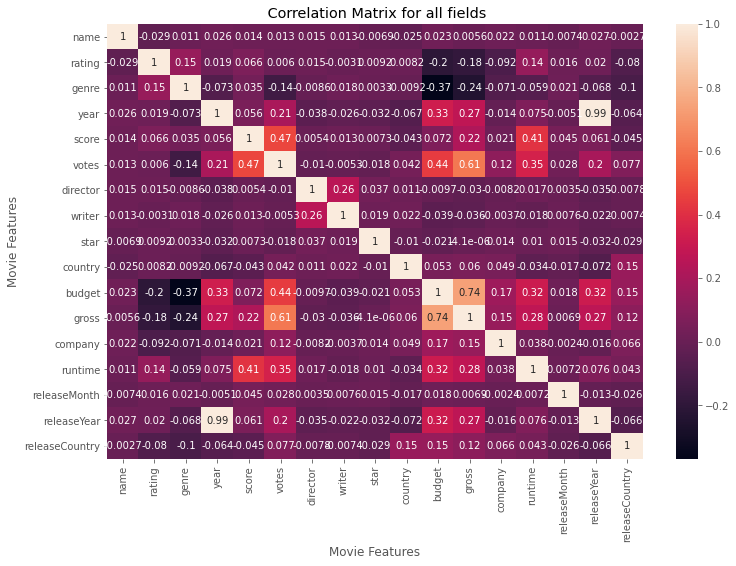

In [57]:
corr_matrix_all = df_encoded_all.corr(method = 'pearson')
sns.heatmap(corr_matrix_all, annot = True)
plt.title(' Correlation Matrix for all fields')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [58]:
corr_matrix_all.unstack()

name            name              1.000000
                rating           -0.029234
                genre             0.010996
                year              0.025542
                score             0.014450
                                    ...   
releaseCountry  company           0.065691
                runtime           0.043242
                releaseMonth     -0.026395
                releaseYear      -0.066047
                releaseCountry    1.000000
Length: 289, dtype: float64

In [61]:
sort_pair = corr_matrix_all.unstack().sort_values(ascending = False)

In [70]:
high_corr = sort_pair[(sort_pair) > 0.5]

In [72]:
high_corr = high_corr[(high_corr) < 1]

In [73]:
high_corr

releaseYear  year           0.994821
year         releaseYear    0.994821
gross        budget         0.740247
budget       gross          0.740247
gross        votes          0.614751
votes        gross          0.614751
dtype: float64

In [74]:
# Thus we see only two factors have a significant positive correlation to the gross earning of the film
# Budget
# Votes